####Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.pandas.set_option('display.max_columns',None)

####Dataset Load

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


####Checking is there any null value

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.shape

(303, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


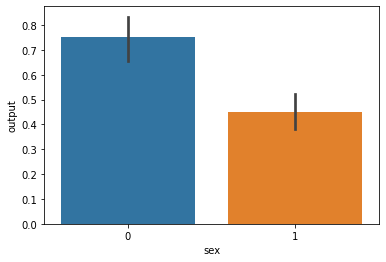

In [ ]:
sns.barplot('sex','output',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


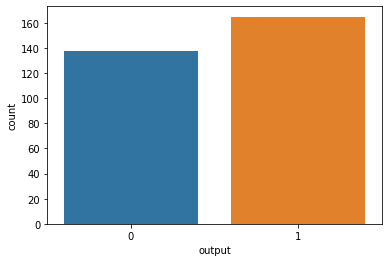

In [ ]:
sns.countplot('output',data=df)

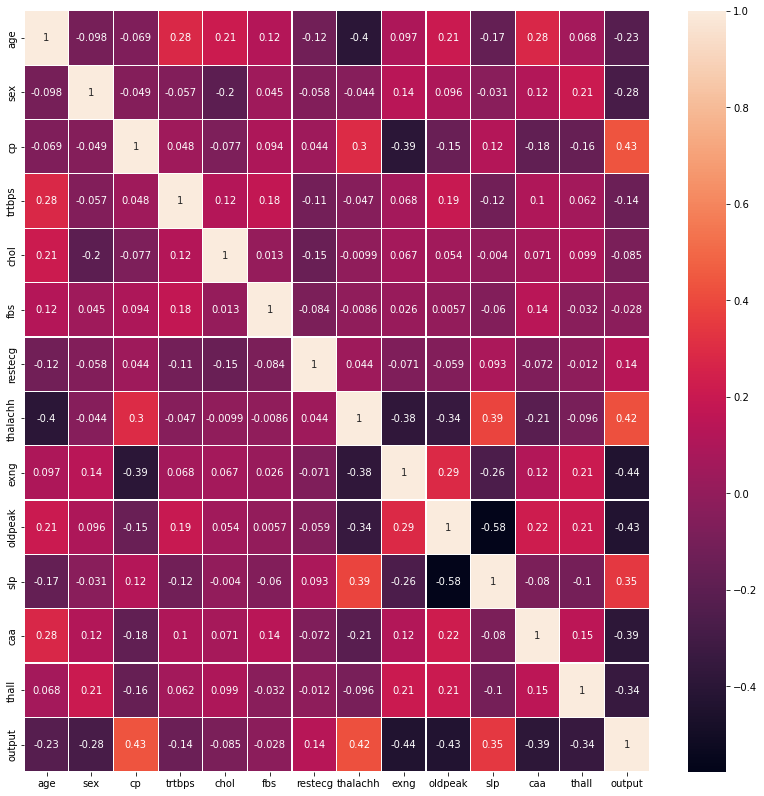

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True, linewidths=.2, ax=ax)

####Fitting the line graph

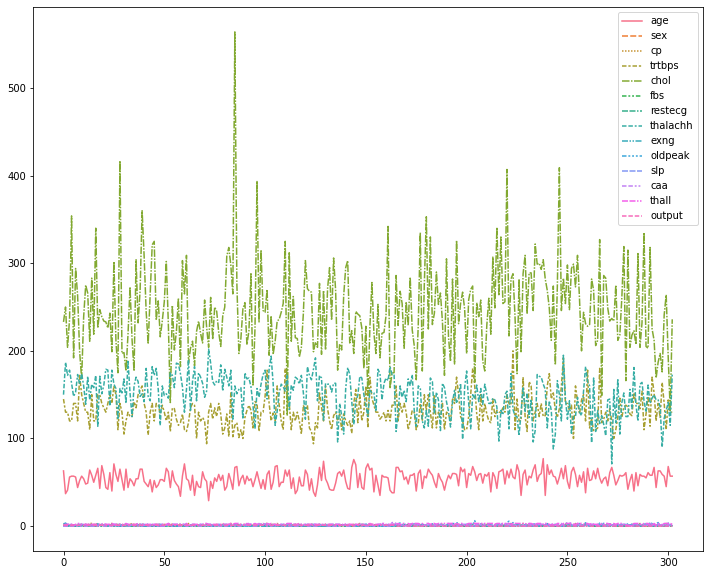

In [ ]:
plt.figure(figsize=(12, 10))
sns.lineplot(data=df)

####Train-test split

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

####For support vector machine

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train)
X_test_transform = sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svc=SVC()

In [ ]:
svc.fit(X_train_transform,y_train)

SVC()

In [ ]:
print('Train Accuracy:',svc.score(X_train_transform,y_train)*100)
print('Test Accuracy:',svc.score(X_test_transform,y_test)*100)

Train Accuracy: 90.49586776859503
Test Accuracy: 85.24590163934425


####Confusion Matrix

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



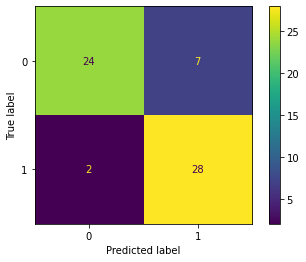

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred=svc.predict(X_test_transform)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=svc.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

disp.plot()
plt.show()

####Roc Curve

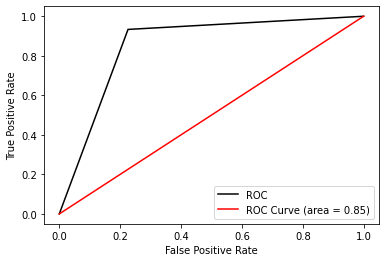

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

####Accuracy/learning curve

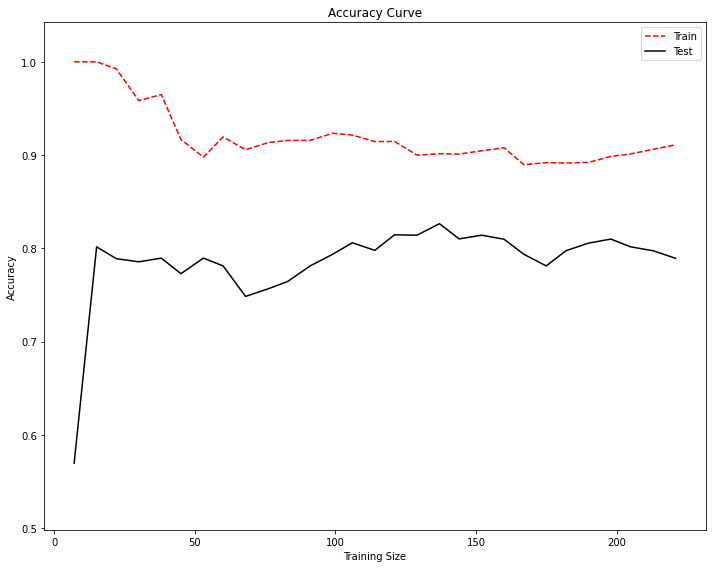

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(svc, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

####Error Curve

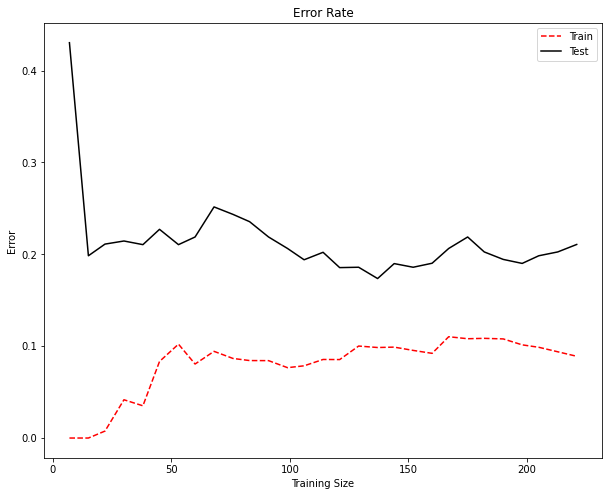

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####For Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('Training Accuracy:', lr.score(X_train, y_train))
print('Testing Accuracy:', lr.score(X_test, y_test))

Training Accuracy: 0.8471074380165289
Testing Accuracy: 0.8688524590163934


              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



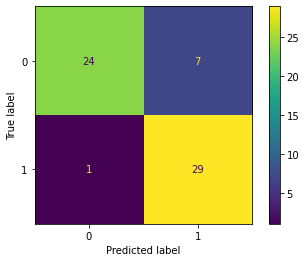

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred=lr.predict(X_test)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=lr.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot()
plt.show()

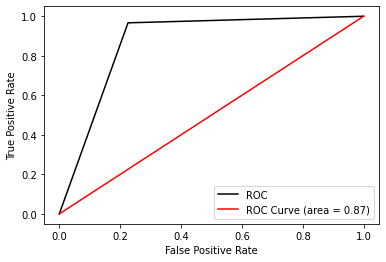

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

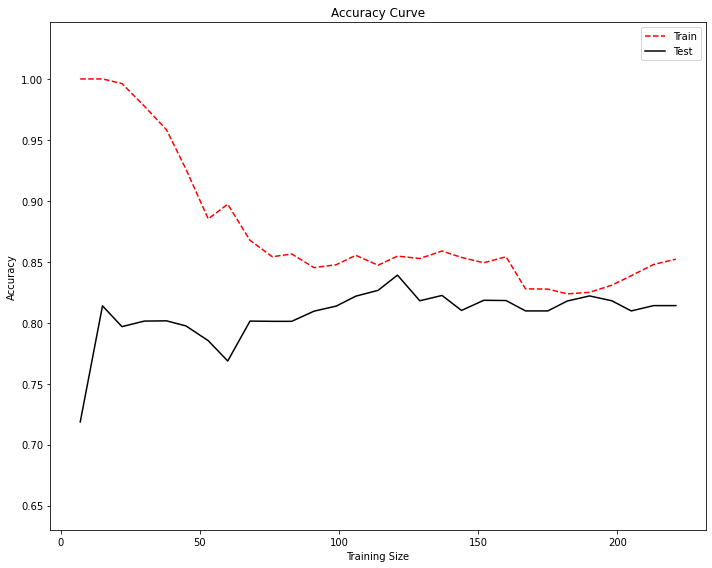

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

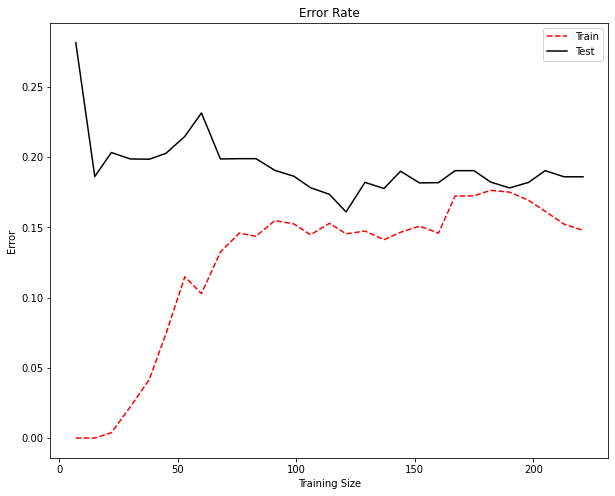

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transform = sc.fit_transform(X_train)
X_test_transform = sc.transform(X_test)

In [ ]:
knn.fit(X_train_transform,y_train)

KNeighborsClassifier()

In [ ]:
print('Training Accuracy:',knn.score(X_train_transform,y_train))
print('Testing Accuracy:',knn.score(X_test_transform,y_test))

Training Accuracy: 0.8553719008264463
Testing Accuracy: 0.8688524590163934


              precision    recall  f1-score   support

           0       0.90      0.84      0.87        31
           1       0.84      0.90      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



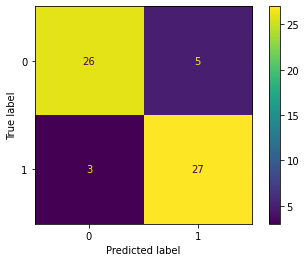

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred=knn.predict(X_test_transform)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=knn.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

disp.plot()
plt.show()

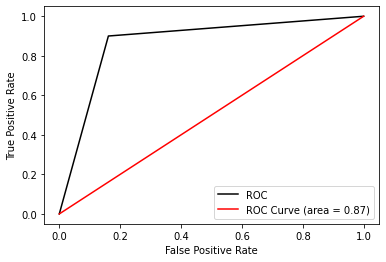

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

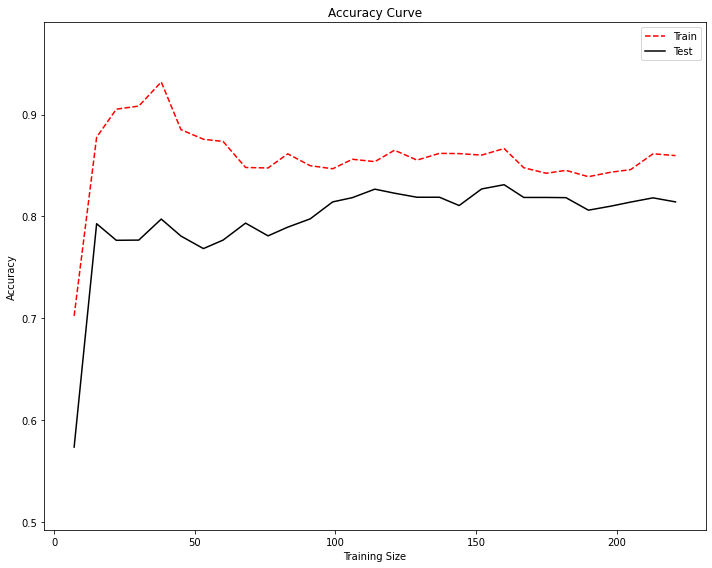

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(knn, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

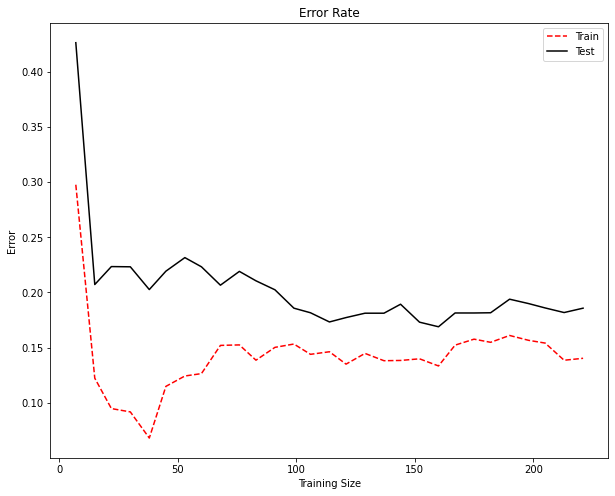

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print('Accuracy:',rf.score(X_train,y_train)*100)
print('Accuracy:',rf.score(X_test,y_test)*100)

Accuracy: 100.0
Accuracy: 86.88524590163934


              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



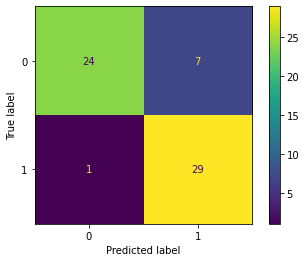

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred=rf.predict(X_test)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)

disp.plot()
plt.show()

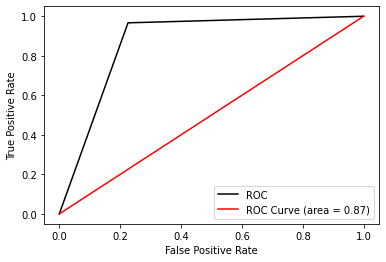

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

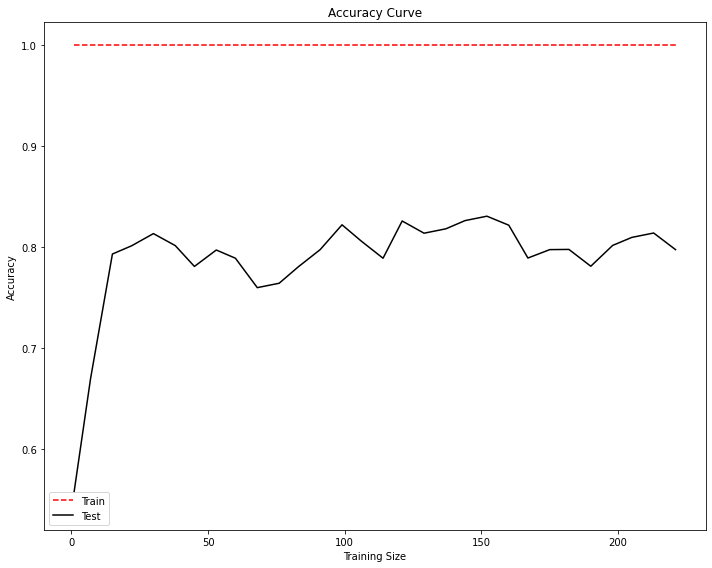

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rf, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

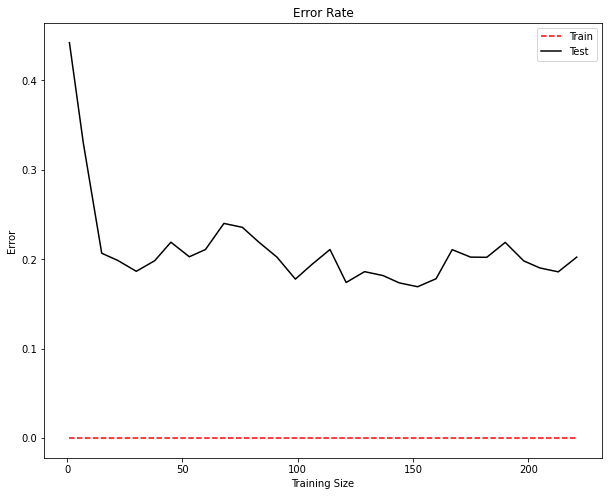

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nv = GaussianNB()

In [ ]:
nv.fit(X_train,y_train)

GaussianNB()

In [ ]:
print('Accuracy:',nv.score(X_train,y_train)*100)
print('Accuracy:',nv.score(X_test,y_test)*100)

Accuracy: 84.29752066115702
Accuracy: 85.24590163934425


              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



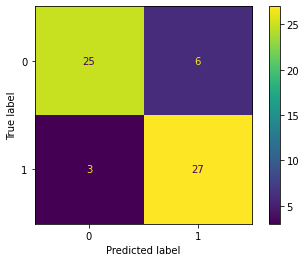

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred=nv.predict(X_test)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=nv.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nv.classes_)

disp.plot()
plt.show()

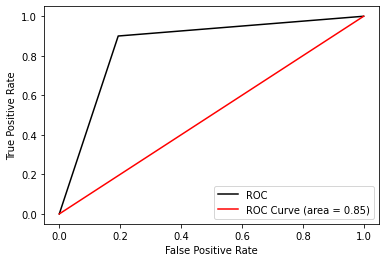

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

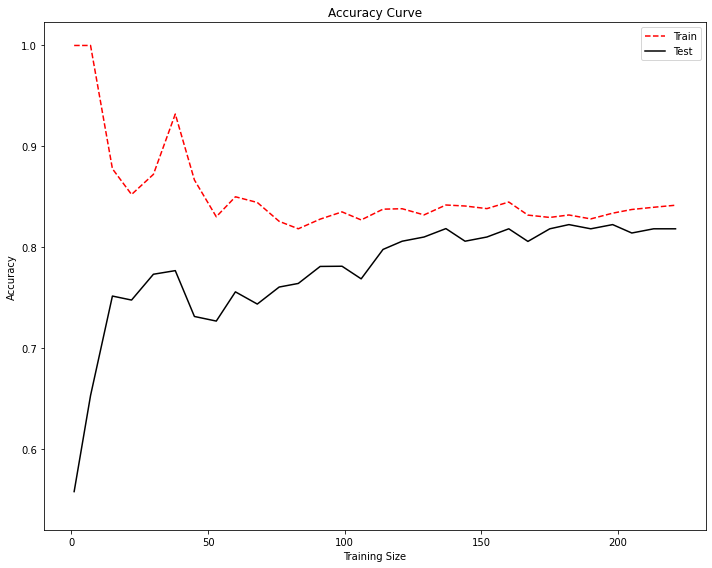

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(nv, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

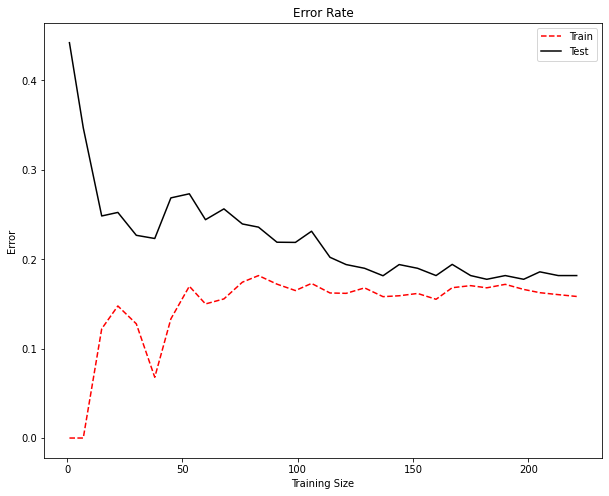

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Train Accuracy:',dt.score(X_train,y_train)*100)
print('Test Accuracy:',dt.score(X_test,y_test)*100)

Train Accuracy: 100.0
Test Accuracy: 80.32786885245902


              precision    recall  f1-score   support

           0       0.85      0.74      0.79        31
           1       0.76      0.87      0.81        30

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



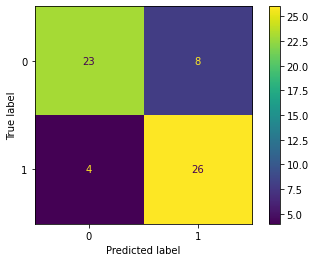

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred=dt.predict(X_test)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=dt.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)

disp.plot()
plt.show()

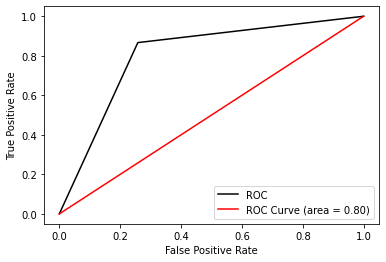

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

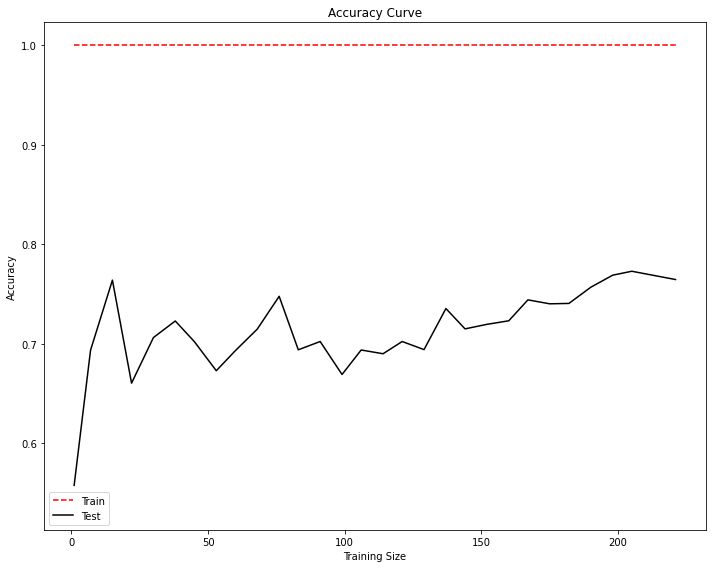

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(dt, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

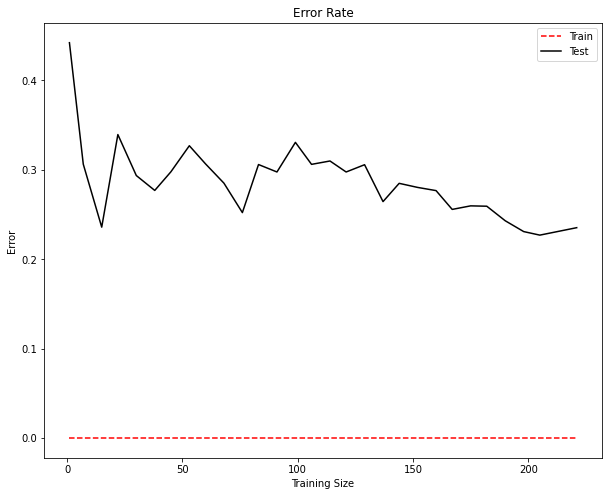

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
print('Train Accuracy:',mlp.score(X_train,y_train)*100)
print('Test Accuracy:',mlp.score(X_test,y_test)*100)

Train Accuracy: 84.71074380165288
Test Accuracy: 81.9672131147541


              precision    recall  f1-score   support

           0       0.95      0.68      0.79        31
           1       0.74      0.97      0.84        30

    accuracy                           0.82        61
   macro avg       0.85      0.82      0.82        61
weighted avg       0.85      0.82      0.82        61



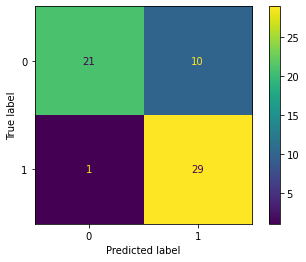

In [ ]:
Y_pred=mlp.predict(X_test)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=mlp.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

disp.plot()
plt.show()

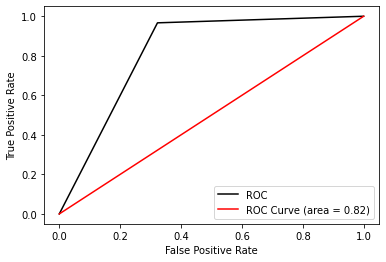

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

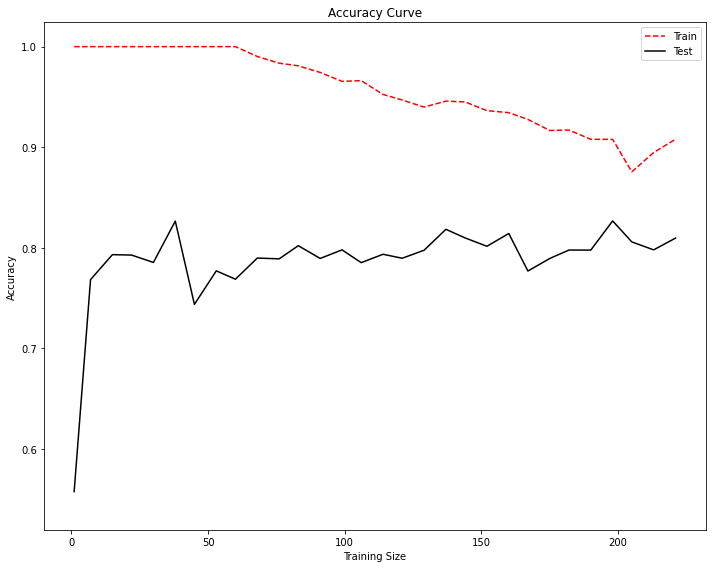

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

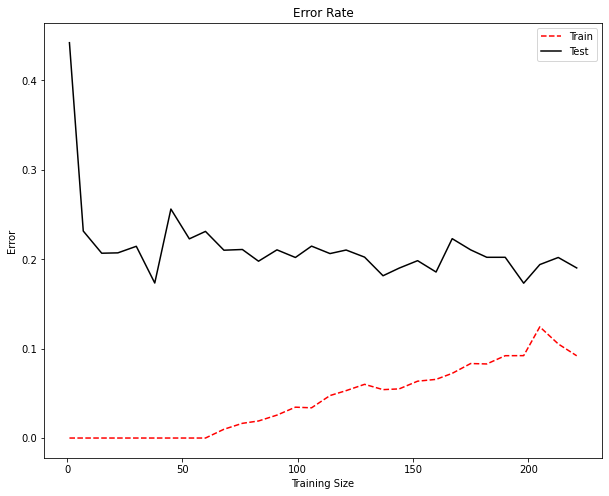

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")

####XG Boost

In [ ]:
import xgboost as xgb
xgb = xgb.XGBClassifier()

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
print('Train Accuracy:',xgb.score(X_train,y_train)*100)
print('Test Accuracy:',xgb.score(X_test,y_test)*100)

Train Accuracy: 98.34710743801654
Test Accuracy: 86.88524590163934


              precision    recall  f1-score   support

           0       0.96      0.77      0.86        31
           1       0.81      0.97      0.88        30

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



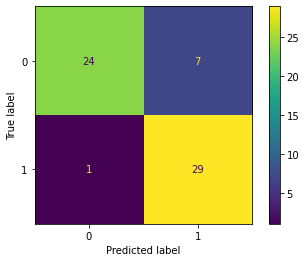

In [ ]:
Y_pred=xgb.predict(X_test)
print(classification_report(y_test, Y_pred))

cm=confusion_matrix(y_test,Y_pred,labels=xgb.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)

disp.plot()
plt.show()

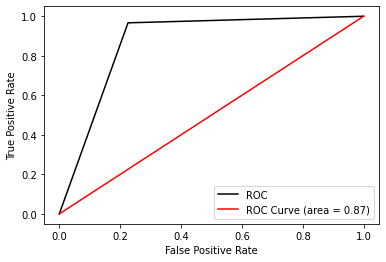

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

tpr, fpr, thresholds = roc_curve(y_test, Y_pred)
roc_score = roc_auc_score(y_test,Y_pred)

plt.plot(tpr, fpr, color = 'black', label = 'ROC')
plt.plot([0,1],[0,1],color = 'red', label = 'ROC Curve (area = %0.2f)'% roc_score)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

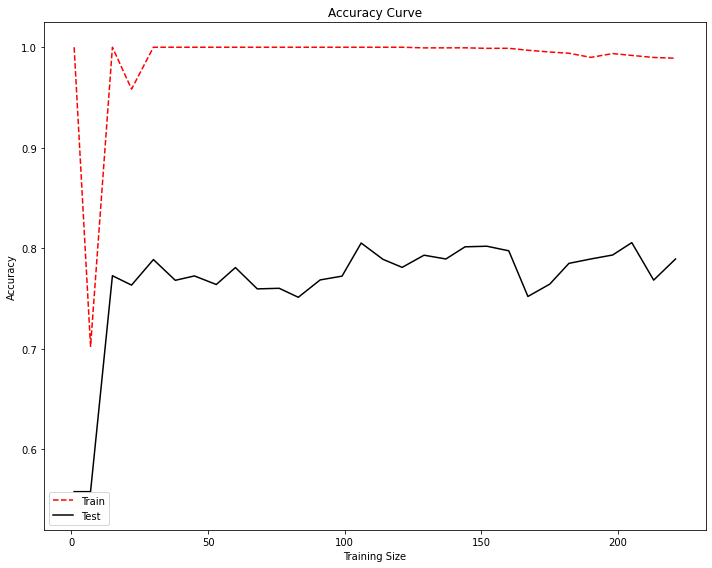

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(xgb, X_train_transform, y_train, cv=12, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.0001, 1.0, 30))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, '--', color="red",  label="Train")
plt.plot(train_sizes, test_mean, color="black", label="Test")

   
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='white')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='white')

   
plt.title("Accuracy Curve")
plt.xlabel("Training Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout(); 
plt.show()

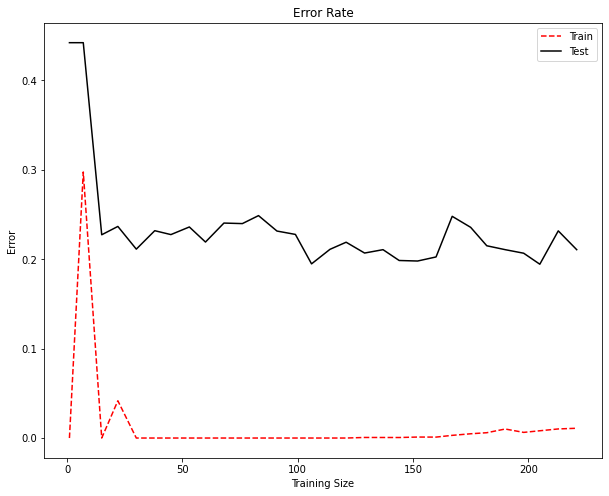

In [ ]:
er_train = 1 - train_mean
er_test = 1 - test_mean

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, er_train, '--', color="red",  label="Train")
plt.plot(train_sizes, er_test, color="black", label="Test")
plt.title("Error Rate")
plt.xlabel("Training Size"), plt.ylabel("Error")
plt.legend(loc="best")